In [1182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas_profiling as pdp

import copy

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import warnings 
warnings.filterwarnings('ignore')

In [1183]:
ti=pd.read_csv('/Users/ajay/Documents/IPyNote/Titanic/train.csv')
ti_test=pd.read_csv('/Users/ajay/Documents/IPyNote/Titanic/test.csv')

In [1184]:
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1185]:
ti['Sex'].unique()


array(['male', 'female'], dtype=object)

In [1186]:
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1187]:
(ti['Sex'].isnull()==True).sum()


0

In [1188]:
dic={'female':'0','male':'1'}
ti['Sex']=ti['Sex'].apply(dic.get)
#haha

In [1189]:
ti['Embarked'].unique()
ti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [1190]:
#print(ti.head(3))
pdp.ProfileReport(ti)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [1191]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1192]:
l=['Miss','Mrs']
regstr = '|'.join(l)
ti[ti['Name'].str.contains(regstr)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [1193]:
ti[ti['Sex']=='0'].shape[0]

314

In [1194]:
ti[(ti['Sex']=='0') & (ti['Survived']==1)].shape[0]

233

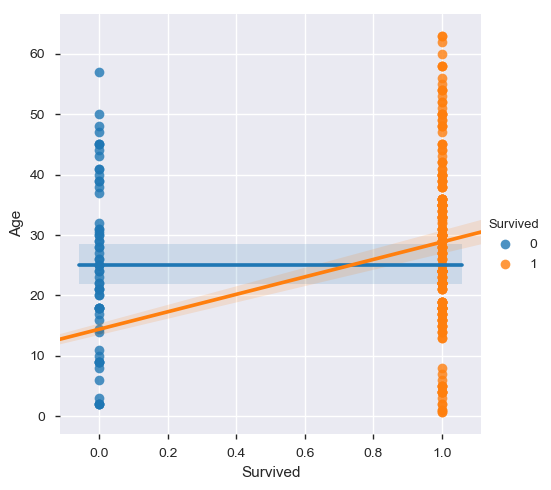

In [1195]:
sns.lmplot(data=ti[ti['Sex']=='0'],x='Survived',y='Age',hue='Survived')

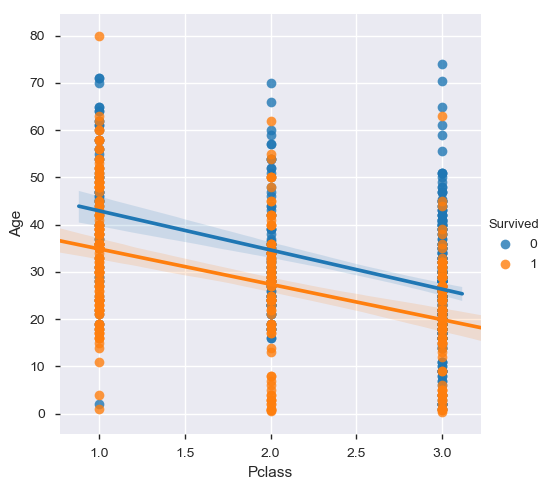

In [1196]:
sns.lmplot(data=ti,x='Pclass',y='Age',hue='Survived')

In [1197]:
#ti.drop(['Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)


In [1198]:
ti.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [1199]:
#ti['Sex']=ti['Sex'].astype('int64')
#haha

In [1200]:
ti.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,S


In [1201]:
ti['Fare'].fillna(ti['Fare'].median(),inplace=True)

In [1202]:
print("Maximum Age: ",ti['Age'].max())
print("Minimum Age: ",ti['Age'].min())

Maximum Age:  80.0
Minimum Age:  0.42


In [1203]:
print("Cheapest Fare: ",ti['Fare'].min())
print("Most Expensive: ",ti['Fare'].max())
print("Mean Fare: ",ti['Fare'].mean())
print("Median Fare: ",ti['Fare'].median())
print("Mode Fare: ",ti['Fare'].mode())

Cheapest Fare:  0.0
Most Expensive:  512.3292
Mean Fare:  32.2042079686
Median Fare:  14.4542
Mode Fare:  0    8.05
dtype: float64


In [1204]:
#dic={'female':'0','male':'1'}
#ti['Sex']=ti['Sex'].apply(dic.get)


In [1205]:
ti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [1206]:
#survival rate for men and women
print("Survival Rate: \n")
#print("Women-",ti[(ti['Survived']==1) & (ti['Sex']=='0')].shape[0]/ti[(ti['Sex']=='0')].shape[0])
#print("Men-",ti[(ti['Survived']==1) & (ti['Sex']=='1')].shape[0]/ti[(ti['Sex']=='1')].shape[0])

Survival Rate: 



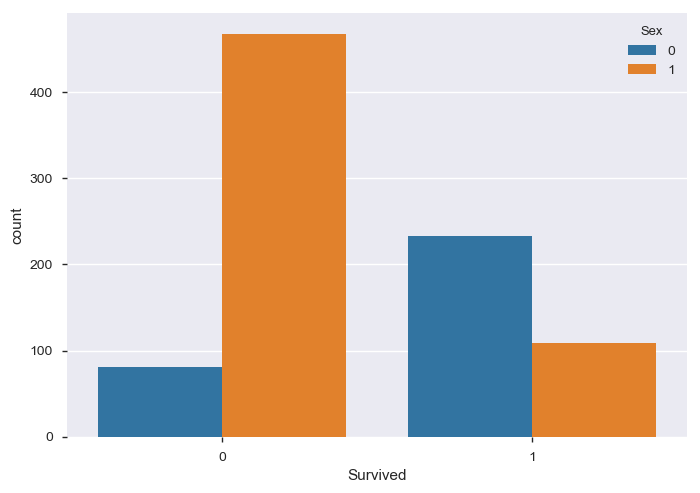

In [1207]:
sns.countplot(x="Survived",hue='Sex',data=ti)

In [1208]:
print(ti[(ti['Survived']==1) & (ti['Pclass']==1) & (True)].shape[0]/ti[(ti['Pclass']==1)].shape[0])

0.6296296296296297


In [1209]:
print(ti[(ti['Survived']==1) & (ti['Pclass']==2) & (True)].shape[0]/ti[(ti['Pclass']==2)].shape[0])

0.47282608695652173


In [1210]:
print(ti[(ti['Survived']==1) & (ti['Pclass']==3) & (True)].shape[0]/ti[(ti['Pclass']==3)].shape[0])

0.24236252545824846


In [1211]:
ti.shape

(891, 12)

In [1212]:
ti[(ti['Survived']==1) & (ti['Pclass']==1) & (True)].shape[0]

136

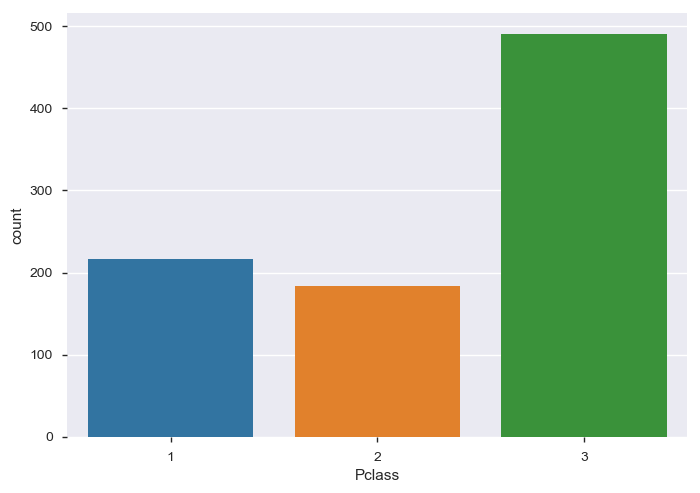

In [1213]:
sns.countplot(x='Pclass',data=ti)

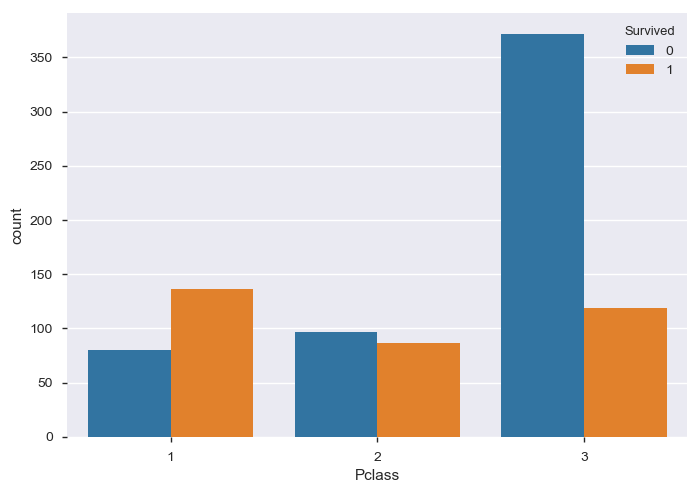

In [1214]:
sns.countplot(x='Pclass',hue='Survived',data=ti)

In [1215]:
#df=ti['Pclass','mean Survived']
#sns.barplot(x='Pclass',data=df)

In [1216]:
c=ti.groupby(['Pclass'],as_index=False).mean()
c

,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
1,2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
2,3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [1217]:
c['Survived']

0    0.629630
1    0.472826
2    0.242363
Name: Survived, dtype: float64

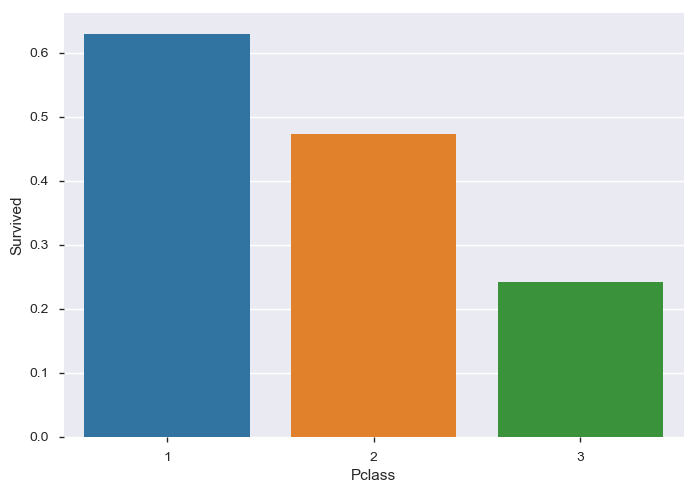

In [1218]:
sns.barplot(x='Pclass',y='Survived',data=c)

[]

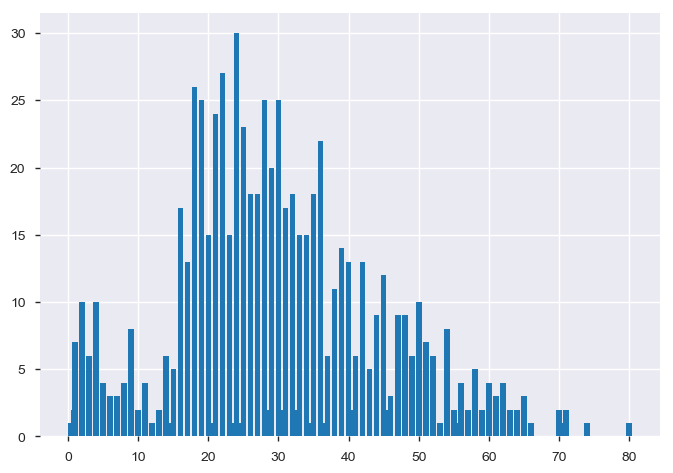

In [1219]:
x=ti['Age'].value_counts().index
#x=x.astype('int64')
y=ti['Age'].value_counts().values
plt.bar(x,y)
plt.plot()


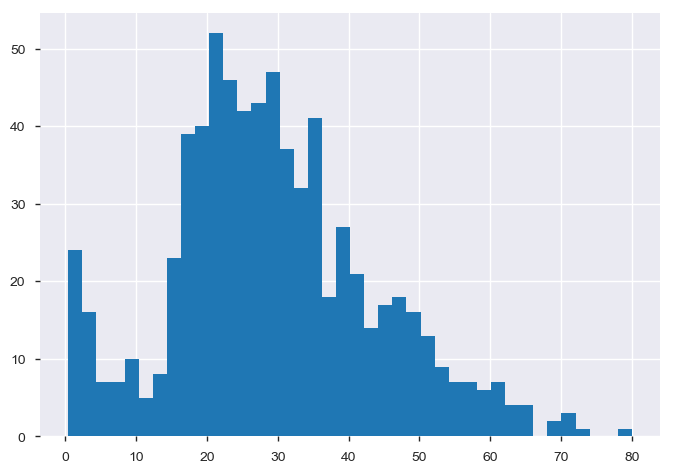

In [1220]:
ti['Age'].hist(bins=40)

In [1221]:
type(ti['Age'])

pandas.core.series.Series

In [1222]:
ti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [1223]:
print(ti['SibSp'].unique())
ti['SibSp'].isnull().sum()


[1 0 3 4 2 5 8]


0

In [1224]:
print(ti['Parch'].unique())
ti['Parch'].isnull().sum()

[0 1 2 5 3 4 6]


0

In [1225]:
ti['Family']=ti['Parch']+ti['SibSp']
ti['Family']=ti['Family'].apply(lambda x: x>0).astype('int64')
#haha

In [1226]:
ti[(ti['Survived']==1) & (ti['SibSp']!=0) & (ti['Parch']!=0)].shape[0]

62

In [1227]:
ti[(True) & (ti['SibSp']!=0) & (ti['Parch']!=0)].shape[0]

142

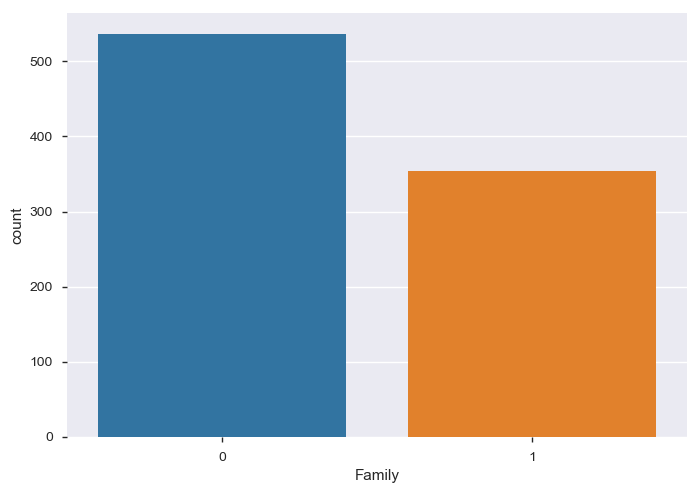

In [1228]:
sns.countplot('Family',data=ti)

In [1229]:
c=ti.groupby(['Survived'],as_index=False).mean()
c

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family
0,0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.318761
1,1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408,0.523392


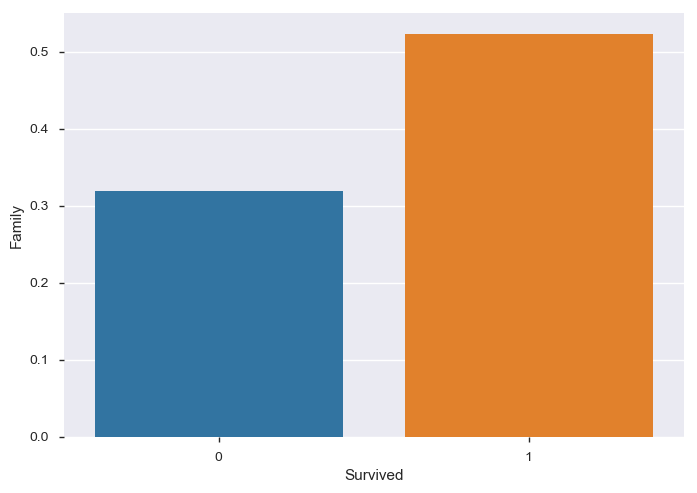

In [1230]:
sns.barplot(x='Survived',data=c,y='Family')

In [1231]:
ti.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hippach, Miss. Jean Gertrude",1,1601,B96 B98,S
freq,1,577,7,4,644


In [1232]:
ti[ti['Name']=="Doling, Mrs. John T (Ada Julia Bone)"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",0,34.0,0,1,231919,23.0,NaN,S,1


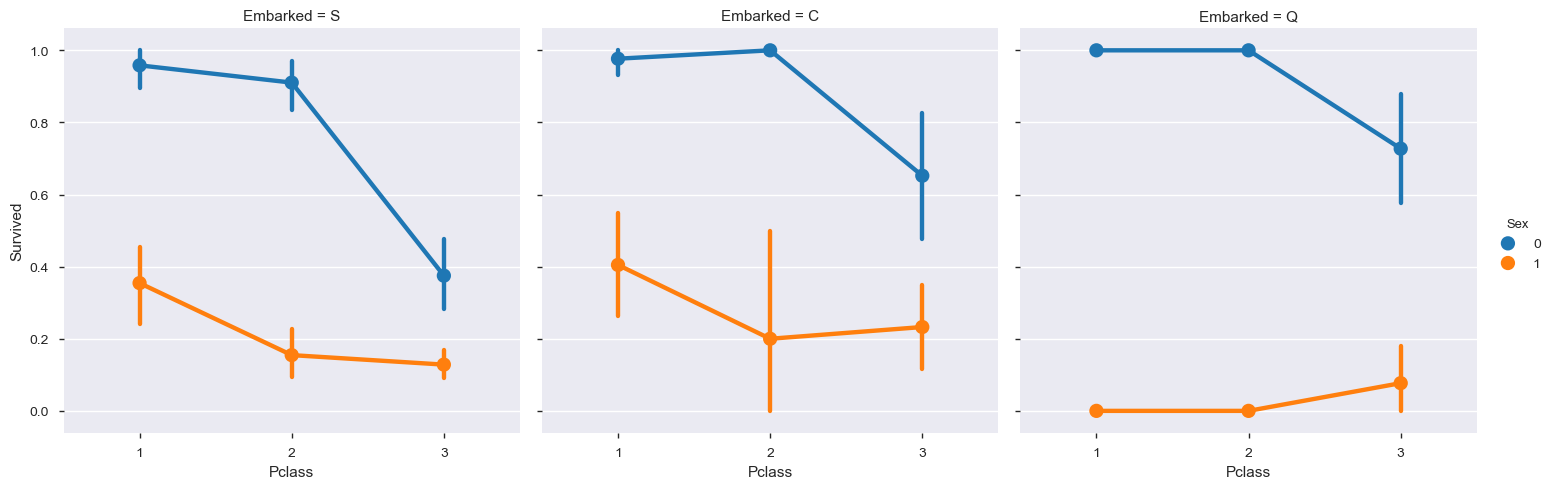

In [1233]:
sns.factorplot(x='Pclass',y='Survived',data=ti,hue="Sex",col="Embarked")

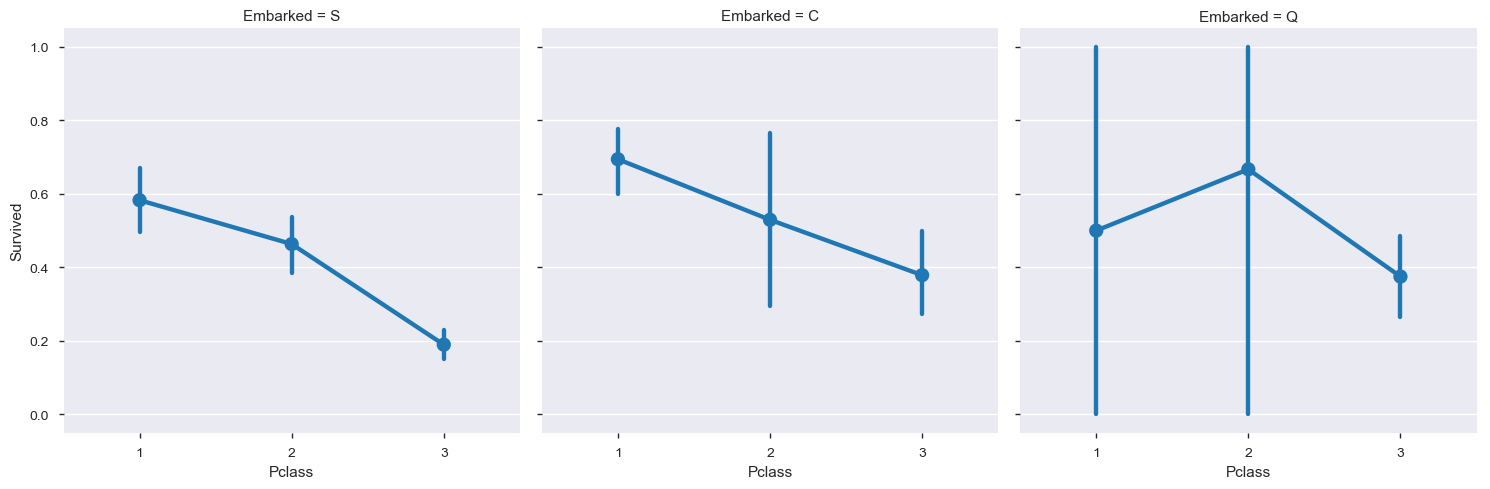

In [1234]:
sns.factorplot(x='Pclass',y='Survived',data=ti,col="Embarked")

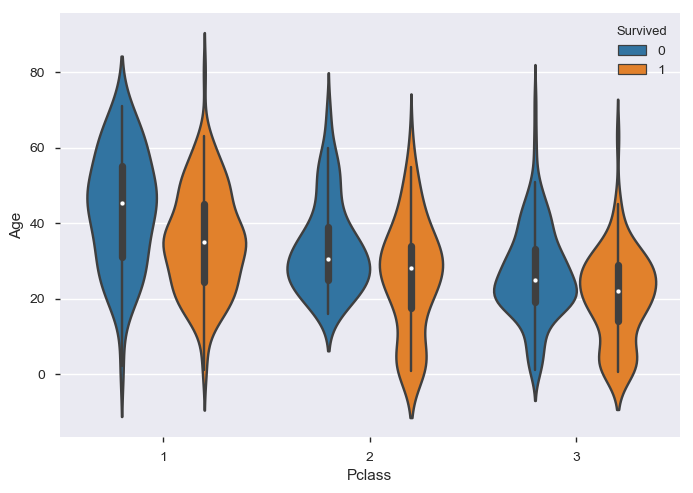

In [1235]:
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=ti)

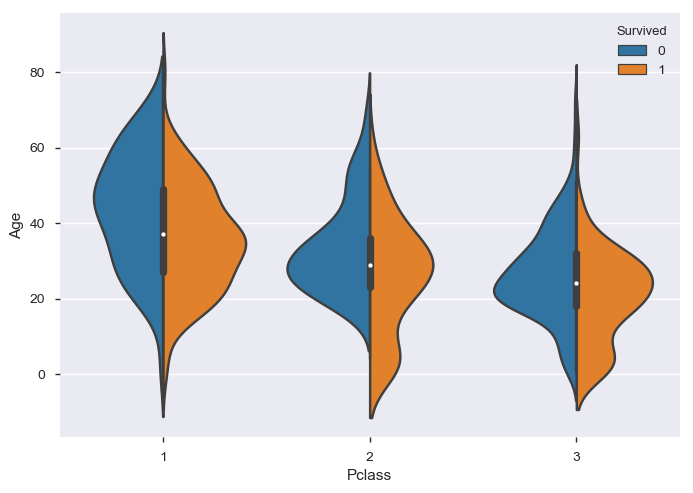

In [1236]:
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=ti,split=True)

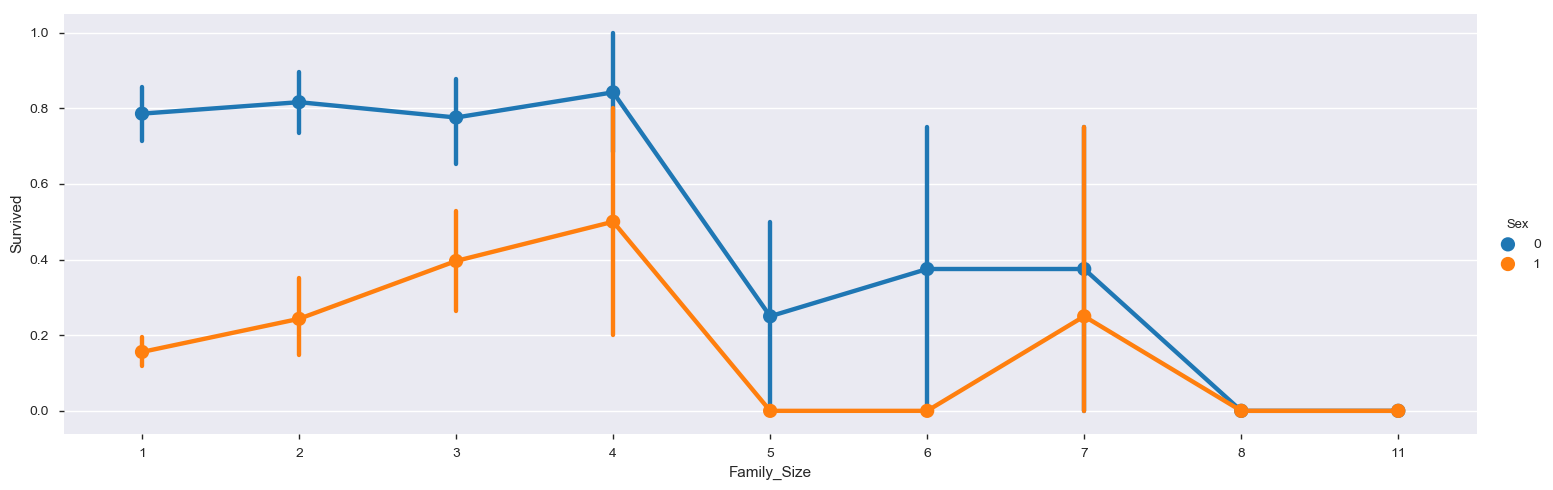

In [1237]:
ti['Family_Size']=ti['SibSp']+ti['Parch']+1
sns.factorplot(x="Family_Size",y="Survived",data=ti,hue="Sex",aspect=3)
#haha

In [1238]:
list(ti)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Family',
 'Family_Size']

In [1239]:
c=ti.groupby('Pclass',as_index=False).mean()
#sns.

In [1240]:
c

,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare,Family,Family_Size
0,1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,0.495370,1.773148
1,2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.434783,1.782609
2,3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,0.340122,2.008147


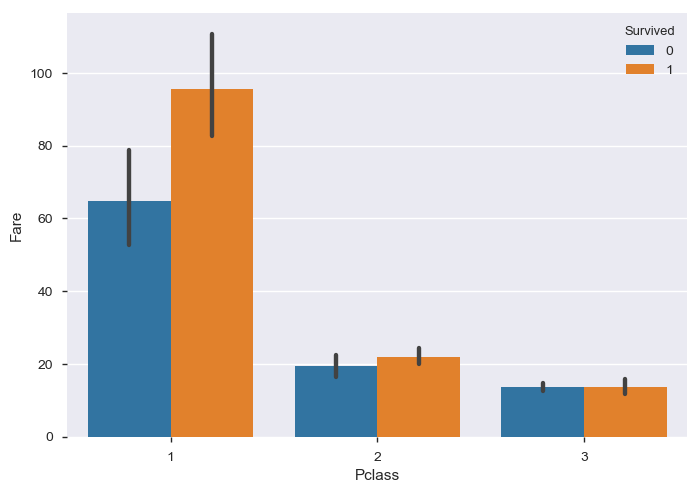

In [1241]:
sns.barplot(x="Pclass",y="Fare",hue="Survived",data=ti)

In [1242]:
ab=ti['Name'].str.split(',').str[1]
ab
x=ab.str.strip().str.split('.').str[0]
x.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [1243]:
ti_test['Name'].str.split(',').str[1].str.strip().str.split('.').str[0].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'], dtype=object)

In [1244]:
ti['Title']=ti['Name'].map(lambda x:x.split(',')[1].strip().split('.')[0])

In [1245]:
ti['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [1246]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
ti['Title']=ti['Title'].map(Title_Dictionary)
#ti_test['Title']=ti_test['Title'].map(Title_Dictionary)
ti['Title'].isnull().sum()
#haha
ti['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [1247]:
ti['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [1248]:
meannan=ti.groupby(['Sex','Pclass','Title']).mean()[['Survived','Age','Fare']]

In [1249]:
mediannan=ti.groupby(['Sex','Pclass','Title']).median()[['Survived','Age','Fare']]

In [1250]:
#modenan=ti.groupby(['Sex','Pclass','Title'].reset_index().modenan)

In [1251]:
meannan=meannan.reset_index()
mediannan=mediannan.reset_index()
print()

In [1252]:
type(meannan)
meannan

,Sex,Pclass,Title,Survived,Age,Fare
0,0,1,Miss,0.958333,29.744681,121.694356
1,0,1,Mrs,0.976744,40.400000,92.615505
2,0,1,Officer,1.000000,49.000000,25.929200
3,0,1,Royalty,1.000000,40.500000,63.050000
4,0,2,Miss,0.941176,22.390625,20.393750
5,0,2,Mrs,0.904762,33.547619,23.246231
6,0,3,Miss,0.500000,16.123188,15.248043
7,0,3,Mrs,0.500000,33.515152,18.233529
8,1,1,Master,1.000000,5.306667,117.802767
9,1,1,Mr,0.345794,41.580460,68.034385


In [1253]:
vmedian=ti.merge(mediannan,on=['Sex','Pclass','Title'],how='left')

In [1254]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Family         891 non-null int64
Family_Size    891 non-null int64
Title          891 non-null object
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


In [1255]:
vmedian['Age_x'].fillna(vmedian['Age_y'],inplace=True)
ti['Age']=vmedian['Age_x']
#haha

In [1256]:
vmean=ti.merge(meannan,on=['Sex','Pclass','Title'],how='left')
vmean['Fare_x'].fillna(vmean['Fare_y'])
ti['Fare']=vmean['Fare_x']
#haha

In [1257]:
print(ti['Embarked'].isnull().sum())
ti[ti['Embarked'].isnull()]

2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Size,Title
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN,0,1,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN,0,1,Mrs


In [1258]:
ti['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1259]:
ti[ti['Embarked'].isnull()]['Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

In [1260]:
ti.groupby(['Sex','Pclass','Embarked']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  \
Sex Pclass Embarked                                                           
0   1      C                  43        43    43   43     43     43      43   
           Q                   1         1     1    1      1      1       1   
           S                  48        48    48   48     48     48      48   
    2      C                   7         7     7    7      7      7       7   
           Q                   2         2     2    2      2      2       2   
           S                  67        67    67   67     67     67      67   
    3      C                  23        23    23   23     23     23      23   
           Q                  33        33    33   33     33     33      33   
           S                  88        88    88   88     88     88      88   
1   1      C                  42        42    42   42     42     42      42   
           Q                   1         1     1    1      1      1       1   
           S                  79        79    79   79     79     79      79   
    2      C                  10        10    10   10     10     10      10   
           Q                   1         1     1    1      1      1       1   
           S                  97        97    97   97     97     97      97   
    3      C                  43        43    43   43     43     43      43   
           Q                  39        39    39   39     39     39      39   
           S                 265       265   265  265    265    265     265   

                     Fare  Cabin  Family  Family_Size  Title  
Sex Pclass Embarked                                           
0   1      C           43     35      43           43     43  
           Q            1      1       1            1      1  
           S           48     43      48           48     48  
    2      C            7      1       7            7      7  
           Q            2      1       2            2      2  
           S           67      8      67           67     67  
    3      C           23      1      23           23     23  
           Q           33      0      33           33     33  
           S           88      5      88           88     88  
1   1      C           42     31      42           42     42  
           Q            1      1       1            1      1  
           S           79     63      79           79     79  
    2      C           10      1      10           10     10  
           Q            1      0       1            1      1  
           S           97      5      97           97     97  
    3      C           43      0      43           43     43  
           Q           39      1      39           39     39  
           S          265      5     265          265    265

In [1261]:
ti.groupby(['Sex','Pclass','Embarked']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex Pclass Embarked                                                         
0   1      C          423.627907  0.976744  36.279070  0.511628  0.302326   
           Q          413.000000  1.000000  33.000000  1.000000  0.000000   
           S          512.187500  0.958333  33.312500  0.604167  0.625000   
    2      C          467.000000  1.000000  19.142857  0.714286  0.571429   
           Q          313.500000  1.000000  27.000000  0.000000  0.000000   
           S          444.477612  0.910448  29.634328  0.477612  0.626866   
    3      C          453.869565  0.652174  18.086957  0.565217  0.826087   
           Q          376.636364  0.727273  19.863636  0.212121  0.242424   
           S          394.238636  0.375000  22.954545  1.238636  1.000000   
1   1      C          458.380952  0.404762  40.357143  0.238095  0.333333   
           Q          246.000000  0.000000  44.000000  2.000000  0.000000   
           S          456.974684  0.354430  41.536962  0.329114  0.253165   
    2      C          428.500000  0.200000  26.950000  0.500000  0.500000   
           Q          627.000000  0.000000  57.000000  0.000000  0.000000   
           S          448.123711  0.154639  30.884845  0.329897  0.195876   
    3      C          450.209302  0.232558  24.405116  0.232558  0.139535   
           Q          457.333333  0.076923  26.769231  0.589744  0.128205   
           S          456.109434  0.128302  26.298113  0.528302  0.252830   

                           Fare    Family  Family_Size  
Sex Pclass Embarked                                     
0   1      C         115.640309  0.581395     1.813953  
           Q          90.000000  1.000000     2.000000  
           S          99.026910  0.708333     2.229167  
    2      C          25.268457  0.714286     2.285714  
           Q          12.350000  0.000000     1.000000  
           S          21.912687  0.582090     2.104478  
    3      C          14.694926  0.782609     2.391304  
           Q          10.307833  0.242424     1.454545  
           S          18.670077  0.659091     3.238636  
1   1      C          93.536707  0.452381     1.571429  
           Q          90.000000  1.000000     3.000000  
           S          52.949947  0.341772     1.582278  
    2      C          25.421250  0.600000     2.000000  
           Q          12.350000  0.000000     1.000000  
           S          19.232474  0.309278     1.525773  
    3      C           9.352237  0.232558     1.372093  
           Q          11.924251  0.256410     1.717949  
           S          13.307149  0.237736     1.781132

In [1262]:
ti.groupby(['Sex','Pclass','Family','Embarked']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  \
Sex Pclass Family Embarked                                                   
0   1      0      C                  18        18    18   18     18     18   
                  S                  14        14    14   14     14     14   
           1      C                  25        25    25   25     25     25   
                  Q                   1         1     1    1      1      1   
                  S                  34        34    34   34     34     34   
    2      0      C                   2         2     2    2      2      2   
                  Q                   2         2     2    2      2      2   
                  S                  28        28    28   28     28     28   
           1      C                   5         5     5    5      5      5   
                  S                  39        39    39   39     39     39   
    3      0      C                   5         5     5    5      5      5   
                  Q                  25        25    25   25     25     25   
                  S                  30        30    30   30     30     30   
           1      C                  18        18    18   18     18     18   
                  Q                   8         8     8    8      8      8   
                  S                  58        58    58   58     58     58   
1   1      0      C                  23        23    23   23     23     23   
                  S                  52        52    52   52     52     52   
           1      C                  19        19    19   19     19     19   
                  Q                   1         1     1    1      1      1   
                  S                  27        27    27   27     27     27   
    2      0      C                   4         4     4    4      4      4   
                  Q                   1         1     1    1      1      1   
                  S                  67        67    67   67     67     67   
           1      C                   6         6     6    6      6      6   
                  S                  30        30    30   30     30     30   
    3      0      C                  33        33    33   33     33     33   
                  Q                  29        29    29   29     29     29   
                  S                 202       202   202  202    202    202   
           1      C                  10        10    10   10     10     10   
                  Q                  10        10    10   10     10     10   
                  S                  63        63    63   63     63     63   

                            Ticket  Fare  Cabin  Family_Size  Title  
Sex Pclass Family Embarked                                           
0   1      0      C             18    18     12           18     18  
                  S             14    14     12           14     14  
           1      C             25    25     23           25     25  
                  Q              1     1      1            1      1  
                  S             34    34     31           34     34  
    2      0      C              2     2      1            2      2  
                  Q              2     2      1            2      2  
                  S             28    28      7           28     28  
           1      C              5     5      0            5      5  
                  S             39    39      1           39     39  
    3      0      C              5     5      0            5      5  
                  Q             25    25      0           25     25  
                  S             30    30      0           30     30  
           1      C             18    18      1           18     18  
                  Q              8     8      0            8      8  
                  S             58    58      5           58     58  
1   1      0      C             23    23     14           23     23  
                  S             52    52     

In [1263]:
ti.groupby(['Sex','Pclass','Family','Embarked']).mean()

PassengerId  Survived        Age     SibSp  \
Sex Pclass Family Embarked                                               
0   1      0      C          394.333333  0.944444  35.111111  0.000000   
                  S          560.214286  1.000000  32.571429  0.000000   
           1      C          444.720000  1.000000  37.120000  0.880000   
                  Q          413.000000  1.000000  33.000000  1.000000   
                  S          492.411765  0.941176  33.617647  0.852941   
    2      0      C          432.000000  1.000000  20.000000  0.000000   
                  Q          313.500000  1.000000  27.000000  0.000000   
                  S          402.785714  0.892857  34.125000  0.000000   
           1      C          481.000000  1.000000  18.800000  1.000000   
                  S          474.410256  0.923077  26.410256  0.820513   
    3      0      C          432.000000  0.800000  21.400000  0.000000   
                  Q          352.320000  0.760000  18.540000  0.000000   
                  S          431.566667  0.466667  25.333333  0.000000   
           1      C          459.944444  0.611111  17.166667  0.722222   
                  Q          452.625000  0.625000  24.000000  0.875000   
                  S          374.931034  0.327586  21.724138  1.879310   
1   1      0      C          493.565217  0.347826  41.565217  0.000000   
                  S          480.134615  0.326923  44.298077  0.000000   
           1      C          415.789474  0.473684  38.894737  0.526316   
                  Q          246.000000  0.000000  44.000000  2.000000   
                  S          412.370370  0.407407  36.219259  0.962963   
    2      0      C          289.750000  0.250000  30.250000  0.000000   
                  Q          627.000000  0.000000  57.000000  0.000000   
                  S          453.462687  0.089552  33.388060  0.000000   
           1      C          521.000000  0.166667  24.750000  0.833333   
                  S          436.200000  0.300000  25.294333  1.066667   
    3      0      C          466.666667  0.151515  27.212121  0.000000   
                  Q          506.655172  0.068966  29.413793  0.000000   
                  S          469.549505  0.123762  28.259901  0.000000   
           1      C          395.900000  0.500000  15.142000  1.000000   
                  Q          314.300000  0.100000  19.100000  2.300000   
                  S          413.015873  0.142857  20.007937  2.222222   

                               Parch        Fare  Family_Size  
Sex Pclass Family Embarked                                     
0   1      0      C         0.000000  120.692128     1.000000  
                  S         0.000000   90.728571     1.000000  
           1      C         0.520000  112.003000     2.400000  
                  Q         0.000000   90.000000     2.000000  
                  S         0.882353  102.443874     2.735294  
    2      0      C         0.000000   12.895850     1.000000  
                  Q         0.000000   12.350000     1.000000  
                  S         0.000000   13.960714     1.000000  
           1      C         0.800000   30.217500     2.800000  
                  S         1.076923   27.621795     2.897436  
    3      0      C         0.000000    8.673340     1.000000  
                  Q         0.000000    7.755340     1.000000  
                  S         0.000000    8.561113     1.000000  
           1      C         1.055556   16.367589     2.777778  
                  Q         1.000000   18.284375     2.875000  
                  S         1.517241   23.898852     4.396552  
1   1      0      C         0.000000   72.163222     1.000000  
                  S         0.000000   32.267146     1.000000  
           1      C         0.736842  119.409874     2.263158  
                  Q         0.000000   90.000000     3.000000  
                  S         0.740741   92.783489     2.703704  
    2      0      C         0.000000   

In [1264]:
ti.fillna({'Embarked':'S'},inplace=True)
ti['Embarked'].isnull().sum()
#haha

0

In [1265]:
ti['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [1266]:
ti.fillna({'Cabin':'U'},inplace=True)
ti['Cabin'].isnull().sum()
#haha

0

In [1267]:
ti['Cabin']=ti['Cabin'].apply(lambda x:x[0])
#haha

In [1268]:
print(ti['Cabin'].isnull().sum())
ti['Cabin'].unique()


0


array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [1269]:
ti.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Family         0
Family_Size    0
Title          0
dtype: int64

In [1270]:
ti['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
5                330877
6                 17463
7                349909
8                347742
9                237736
10              PP 9549
11               113783
12            A/5. 2151
13               347082
14               350406
15               248706
16               382652
17               244373
18               345763
19                 2649
20               239865
21               248698
22               330923
23               113788
24               349909
25               347077
26                 2631
27                19950
28               330959
29               349216
             ...       
861               28134
862               17466
863            CA. 2343
864              233866
865              236852
866       SC/PARIS 2149
867            PC 17590
868              345777
869              347742
870              349248
871             

In [1271]:
ti['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [1272]:
x="DS/BV. 2345"
type(x)

str

In [1273]:
x=x.replace('/','')
x

'DSBV. 2345'

In [1274]:
x=x.replace('.','')
x

'DSBV 2345'

In [1275]:
x=x.split()
#x

In [1276]:
x

['DSBV', '2345']

In [1277]:
b=['423','f32','3452','rge']
list(map(lambda x: x.isdigit(),b))

[True, False, True, False]

In [1278]:
ti['Ticket'].head(2)

0    A/5 21171
1     PC 17599
Name: Ticket, dtype: object

In [1279]:
p=ti['Ticket'].str.replace('/','')
p=p.str.replace('.','')
p=p.str.split()
p=p.apply(lambda x: x[0].strip())
print(p.head(5))
p=p.apply(lambda x:"XX" if(x.isdigit()==True) else x)
print(p.head(5))
#haha

0        A5
1        PC
2    STONO2
3    113803
4    373450
Name: Ticket, dtype: object
0        A5
1        PC
2    STONO2
3        XX
4        XX
Name: Ticket, dtype: object


In [1280]:
ti['Ticket']=p
#haha

In [1281]:
p.unique()

array(['A5', 'PC', 'STONO2', 'XX', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS', 'SOP',
       'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS',
       'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

In [1282]:
'''
c=ti_test['Ticket'].str.replace('/','')
c=c.str.replace('.','')
c=c.str.split()
c=c.apply(lambda x: x[0].strip())
print(c.head(5))
c=c.apply(lambda x:"XX" if(x.isdigit()==True) else x)
print(c.head(5))
'''
#ti_test['Ticket']
#c.unique()

'\nc=ti_test[\'Ticket\'].str.replace(\'/\',\'\')\nc=c.str.replace(\'.\',\'\')\nc=c.str.split()\nc=c.apply(lambda x: x[0].strip())\nprint(c.head(5))\nc=c.apply(lambda x:"XX" if(x.isdigit()==True) else x)\nprint(c.head(5))\n'

In [1283]:
ti.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A5,7.2500,U,S,1,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC,71.2833,C,C,1,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STONO2,7.9250,U,S,0,1,Miss


In [1284]:
ti=ti.drop('Name',axis=1)
ti=ti.drop('PassengerId',axis=1)

#haha

In [1285]:
ti['Family_Size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_Size, dtype: int64

In [1286]:
ti.groupby(['Family_Size','Survived']).count()

Pclass  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  \
Family_Size Survived                                                        
1           0            374  374  374    374    374     374   374    374   
            1            163  163  163    163    163     163   163    163   
2           0             72   72   72     72     72      72    72     72   
            1             89   89   89     89     89      89    89     89   
3           0             43   43   43     43     43      43    43     43   
            1             59   59   59     59     59      59    59     59   
4           0              8    8    8      8      8       8     8      8   
            1             21   21   21     21     21      21    21     21   
5           0             12   12   12     12     12      12    12     12   
            1              3    3    3      3      3       3     3      3   
6           0             19   19   19     19     19      19    19     19   
            1              3    3    3      3      3       3     3      3   
7           0              8    8    8      8      8       8     8      8   
            1              4    4    4      4      4       4     4      4   
8           0              6    6    6      6      6       6     6      6   
11          0              7    7    7      7      7       7     7      7   

                      Embarked  Family  Title  
Family_Size Survived                           
1           0              374     374    374  
            1              163     163    163  
2           0               72      72     72  
            1               89      89     89  
3           0               43      43     43  
            1               59      59     59  
4           0                8       8      8  
            1               21      21     21  
5           0               12      12     12  
            1                3       3      3  
6           0               19      19     19  
            1                3       3      3  
7           0                8       8      8  
            1                4       4      4  
8           0                6       6      6  
11          0                7       7      7

In [1287]:
ti.groupby(['Family_Size','Survived']).mean()

Pclass        Age     SibSp     Parch        Fare  \
Family_Size Survived                                                        
1           0         2.545455  31.327540  0.000000  0.000000   14.127258   
            1         2.067485  30.585890  0.000000  0.000000   37.568891   
2           0         2.250000  31.319444  0.819444  0.180556   34.095315   
            1         1.651685  31.083371  0.719101  0.280899   62.675191   
3           0         2.488372  31.046512  1.093023  0.906977   35.662307   
            1         2.033898  21.395424  0.711864  1.288136   42.629729   
4           0         2.125000  22.625000  1.125000  1.875000   56.425525   
            1         2.047619  16.972381  1.428571  1.571429   54.269838   
5           0         3.000000  16.166667  2.250000  1.750000   26.972233   
            1         1.333333  31.000000  1.666667  2.333333  182.583333   
6           0         2.789474  17.578947  2.842105  2.157895   56.692105   
            1         1.333333  23.666667  2.666667  2.333333  181.583333   
7           0         3.000000  14.875000  3.250000  2.750000   31.289063   
            1         3.000000  15.750000  3.250000  2.750000   25.521875   
8           0         3.000000  15.666667  4.333333  2.666667   46.900000   
11          0         3.000000  19.428571  8.000000  2.000000   69.550000   

                      Family  
Family_Size Survived          
1           0            0.0  
            1            0.0  
2           0            1.0  
            1            1.0  
3           0            1.0  
            1            1.0  
4           0            1.0  
            1            1.0  
5           0            1.0  
            1            1.0  
6           0            1.0  
            1            1.0  
7           0            1.0  
            1            1.0  
8           0            1.0  
11          0            1.0

In [1288]:
ti

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Size,Title
0,0,3,1,22.0,1,0,A5,7.2500,U,S,1,2,Mr
1,1,1,0,38.0,1,0,PC,71.2833,C,C,1,2,Mrs
2,1,3,0,26.0,0,0,STONO2,7.9250,U,S,0,1,Miss
3,1,1,0,35.0,1,0,XX,53.1000,C,S,1,2,Mrs
4,0,3,1,35.0,0,0,XX,8.0500,U,S,0,1,Mr
5,0,3,1,26.0,0,0,XX,8.4583,U,Q,0,1,Mr
6,0,1,1,54.0,0,0,XX,51.8625,E,S,0,1,Mr
7,0,3,1,2.0,3,1,XX,21.0750,U,S,1,5,Master
8,1,3,0,27.0,0,2,XX,11.1333,U,S,1,3,Mrs
9,1,2,0,14.0,1,0,XX,30.0708,U,C,1,2,Mrs


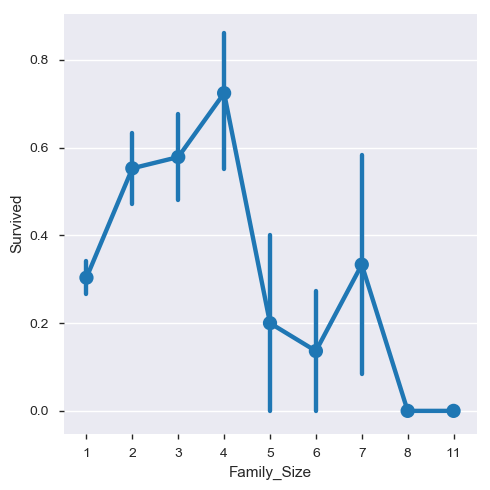

In [1289]:
sns.factorplot(x='Family_Size',y='Survived',data=ti)

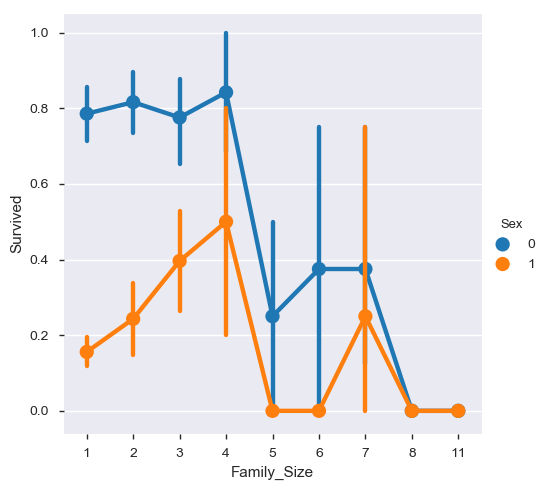

In [1290]:
sns.factorplot(x='Family_Size',y='Survived',hue='Sex',data=ti)

In [1291]:
ti['No_family']=ti['Family_Size'].apply(lambda x: 1 if(x==1) else 0)
#haha

In [1292]:
ti['Small_family']=ti['Family_Size'].apply(lambda x: 1 if(x==2 or x==3 or x==4) else 0)
#haha

In [1293]:
ti['Large_family']=ti['Family_Size'].apply(lambda x: 1 if(x>4) else 0)
#haha

In [1294]:
ti

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Size,Title,No_family,Small_family,Large_family
0,0,3,1,22.0,1,0,A5,7.2500,U,S,1,2,Mr,0,1,0
1,1,1,0,38.0,1,0,PC,71.2833,C,C,1,2,Mrs,0,1,0
2,1,3,0,26.0,0,0,STONO2,7.9250,U,S,0,1,Miss,1,0,0
3,1,1,0,35.0,1,0,XX,53.1000,C,S,1,2,Mrs,0,1,0
4,0,3,1,35.0,0,0,XX,8.0500,U,S,0,1,Mr,1,0,0
5,0,3,1,26.0,0,0,XX,8.4583,U,Q,0,1,Mr,1,0,0
6,0,1,1,54.0,0,0,XX,51.8625,E,S,0,1,Mr,1,0,0
7,0,3,1,2.0,3,1,XX,21.0750,U,S,1,5,Master,0,0,1
8,1,3,0,27.0,0,2,XX,11.1333,U,S,1,3,Mrs,0,1,0
9,1,2,0,14.0,1,0,XX,30.0708,U,C,1,2,Mrs,0,1,0


In [1295]:
X=copy.deepcopy(ti)
Y=X.loc[:,'Survived']
X=X.drop('Survived',axis=1)

In [1296]:
Y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [1297]:
X.isnull().sum()

Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Family          0
Family_Size     0
Title           0
No_family       0
Small_family    0
Large_family    0
dtype: int64

In [1298]:
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Size,Title,No_family,Small_family,Large_family
0,3,1,22.0,1,0,A5,7.2500,U,S,1,2,Mr,0,1,0
1,1,0,38.0,1,0,PC,71.2833,C,C,1,2,Mrs,0,1,0
2,3,0,26.0,0,0,STONO2,7.9250,U,S,0,1,Miss,1,0,0


In [1299]:
le=preprocessing.LabelEncoder()
le.fit(X['Ticket'])
print(le.classes_)
X['Ticket']=le.transform(X['Ticket'])
#haha

le=preprocessing.LabelEncoder()
le.fit(X['Cabin'])
print(le.classes_)
X['Cabin']=le.transform(X['Cabin'])
#haha
X.isnull().sum()

le=preprocessing.LabelEncoder()
le.fit(X['Title'])
print(le.classes_)
X['Title']=le.transform(X['Title'])
#haha

le=preprocessing.LabelEncoder()
le.fit(X['Embarked'])
print(le.classes_)
X['Embarked']=le.transform(X['Embarked'])
#haha

['A4' 'A5' 'AS' 'C' 'CA' 'CASOTON' 'FC' 'FCC' 'Fa' 'LINE' 'PC' 'PP' 'PPP'
 'SC' 'SCA4' 'SCAH' 'SCOW' 'SCPARIS' 'SCParis' 'SOC' 'SOP' 'SOPP' 'SOTONO2'
 'SOTONOQ' 'SP' 'STONO' 'STONO2' 'SWPP' 'WC' 'WEP' 'XX']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T' 'U']
['Master' 'Miss' 'Mr' 'Mrs' 'Officer' 'Royalty']
['C' 'Q' 'S']


In [1300]:
X.head()


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Size,Title,No_family,Small_family,Large_family
0,3,1,22.0,1,0,1,7.2500,8,2,1,2,2,0,1,0
1,1,0,38.0,1,0,10,71.2833,2,0,1,2,3,0,1,0
2,3,0,26.0,0,0,26,7.9250,8,2,0,1,1,1,0,0
3,1,0,35.0,1,0,30,53.1000,2,2,1,2,3,0,1,0
4,3,1,35.0,0,0,30,8.0500,8,2,0,1,2,1,0,0


In [1301]:
X.shape

(891, 15)

In [1302]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [1303]:
Y.shape

(891,)

In [1304]:

X_train,X_val,Y_train,Y_val=train_test_split(X,Y,stratify=Y,test_size=0.20,random_state=2)
#X_val.shape
#X_train.shape

#X_train=X_train.drop("Survived",axis=1)

In [1305]:
'''
result=np.zeros((630,3))
arr=[0.01,0.04,0.07,0.1,0.13,0.16,0.2]
j=0;
for i in range(10,100,1):
    for k in arr:
        GBclf  = GradientBoostingClassifier(n_estimators=13, learning_rate=0.2,max_depth=3,warm_start=True, random_state=7,loss='exponential')
        GBclf.fit(X_train, Y_train)
        Y_pred_GB=GBclf.predict(X_val)                 
        result[j]= j, GBclf.score(X_train,Y_train) , GBclf.score(X_val,Y_val)
        Acc_df=pd.DataFrame(index=result[0:,0],data=result[0:,1:],columns=['Train_acc','Test_acc'])
        print(i,' ',k,' ',GBclf.score(X_train,Y_train),' ',GBclf.score(X_val,Y_val))
        j=j+1

Acc_df.head(3)
plt.plot(Acc_df.Train_acc)
plt.plot(Acc_df.Test_acc)
Acc_df.Test_acc.max()
'''

"\nresult=np.zeros((630,3))\narr=[0.01,0.04,0.07,0.1,0.13,0.16,0.2]\nj=0;\nfor i in range(10,100,1):\n    for k in arr:\n        GBclf  = GradientBoostingClassifier(n_estimators=13, learning_rate=0.2,max_depth=3,warm_start=True, random_state=7,loss='exponential')\n        GBclf.fit(X_train, Y_train)\n        Y_pred_GB=GBclf.predict(X_val)                 \n        result[j]= j, GBclf.score(X_train,Y_train) , GBclf.score(X_val,Y_val)\n        Acc_df=pd.DataFrame(index=result[0:,0],data=result[0:,1:],columns=['Train_acc','Test_acc'])\n        print(i,' ',k,' ',GBclf.score(X_train,Y_train),' ',GBclf.score(X_val,Y_val))\n        j=j+1\n\nAcc_df.head(3)\nplt.plot(Acc_df.Train_acc)\nplt.plot(Acc_df.Test_acc)\nAcc_df.Test_acc.max()\n"

In [1306]:
GBclf  = GradientBoostingClassifier(n_estimators=13, learning_rate=0.2,max_depth=3,warm_start=True, random_state=7,loss='exponential')
GBclf.fit(X_train, Y_train)
Y_pred_GB=GBclf.predict(X_val)

In [1307]:

print("accuracy_score : ", accuracy_score(Y_val,Y_pred_GB))
print("roc_auc_score : ",roc_auc_score(Y_val,Y_pred_GB))
print("Confusion Matrix : \n",confusion_matrix(Y_val, Y_pred_GB))

accuracy_score :  0.849162011173
roc_auc_score :  0.825955204216
Confusion Matrix : 
 [[102   8]
 [ 19  50]]


In [1308]:
GBclf.feature_importances_

array([ 0.08413129,  0.37030352,  0.14296456,  0.01883521,  0.00145764,
        0.02787855,  0.18660437,  0.03790836,  0.01388776,  0.        ,
        0.04374171,  0.02761484,  0.        ,  0.        ,  0.04467218])

In [1309]:
list(X_train)


['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Family',
 'Family_Size',
 'Title',
 'No_family',
 'Small_family',
 'Large_family']

In [1310]:
mx=0;
'''
for i in range(40,120,1):
    for j in range(15,21,1):
        clf=RandomForestClassifier(n_estimators=i,max_depth=j,max_features=15,warm_start=True,n_jobs=-1,min_samples_split=5,min_samples_leaf=1)
        clf.fit(X_train,Y_train)
        Y_pred=clf.predict(X_val)
        acc=roc_auc_score(Y_val, Y_pred)
        print('i=',i,' j=',j,' ',acc)
        if mx<acc:
            fi=i
            fj=j
            mx=max(acc,mx)            
print('\n fi=',fi,' fj=',fj,' mx=',mx)
#clf=RandomForestClassifier(n_estimators=110,max_depth=37,max_features=8,class_weight={0:1,1:0.6},warm_start=True,n_jobs=-1,min_samples_split=5,min_samples_leaf=1)
'''

"\nfor i in range(40,120,1):\n    for j in range(15,21,1):\n        clf=RandomForestClassifier(n_estimators=i,max_depth=j,max_features=15,warm_start=True,n_jobs=-1,min_samples_split=5,min_samples_leaf=1)\n        clf.fit(X_train,Y_train)\n        Y_pred=clf.predict(X_val)\n        acc=roc_auc_score(Y_val, Y_pred)\n        print('i=',i,' j=',j,' ',acc)\n        if mx<acc:\n            fi=i\n            fj=j\n            mx=max(acc,mx)            \nprint('\n fi=',fi,' fj=',fj,' mx=',mx)\n#clf=RandomForestClassifier(n_estimators=110,max_depth=37,max_features=8,class_weight={0:1,1:0.6},warm_start=True,n_jobs=-1,min_samples_split=5,min_samples_leaf=1)\n"

In [1311]:
'''
clf=RandomForestClassifier(n_estimators=47,max_depth=16,max_features=15,warm_start=True,n_jobs=-1,min_samples_split=5,min_samples_leaf=1)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_val)
#acc=roc_auc_score(Y_val, Y_pred)
acc=accuracy_score(Y_val,Y_pred)
print(acc)
'''

'\nclf=RandomForestClassifier(n_estimators=47,max_depth=16,max_features=15,warm_start=True,n_jobs=-1,min_samples_split=5,min_samples_leaf=1)\nclf.fit(X_train,Y_train)\nY_pred=clf.predict(X_val)\n#acc=roc_auc_score(Y_val, Y_pred)\nacc=accuracy_score(Y_val,Y_pred)\nprint(acc)\n'

In [1312]:
#'''
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_val)
acc=roc_auc_score(Y_val, Y_pred)
print(acc)
#'''
clf.feature_importances_
clf.fit(X,Y)

0.853096179183


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1313]:
#Logistic Regression

In [1314]:
ti
X_=copy.deepcopy(ti)

c=pd.get_dummies(ti['Sex'])
X_=pd.concat([X_,c],axis=1)

c=pd.get_dummies(ti['Pclass'])
X_=pd.concat([X_,c],axis=1)

c=pd.get_dummies(ti['Ticket'])
X_=pd.concat([X_,c],axis=1)
 
c=pd.get_dummies(ti['Cabin'])
X_=pd.concat([X_,c],axis=1)
 
c=pd.get_dummies(ti['Embarked'])
X_=pd.concat([X_,c],axis=1)
 

c=pd.get_dummies(ti['Title'])
X_=pd.concat([X_,c],axis=1)

X_=X_.drop('Sex',axis=1)
X_=X_.drop('Pclass',axis=1)
X_=X_.drop('Ticket',axis=1)
X_=X_.drop('Cabin',axis=1)
X_=X_.drop('Embarked',axis=1)
X_=X_.drop('Title',axis=1)

X_=X_.T.drop_duplicates().T

In [1315]:
Y_=X_['Survived']

In [1316]:
X_=X_.drop('Survived',axis=1)

In [1317]:
X_train_,X_test_,Y_train_,Y_test_=train_test_split(X_,Y_,stratify=Y_,test_size=0.2,random_state=34)

print(X_train_.shape)
print(Y_train_.shape)
print(X_test_.shape)
print(Y_test_.shape)



(712, 63)
(712,)
(179, 63)
(179,)


In [1318]:
svcclassifier_linear=SVC(kernel='linear')
svcclassifier_linear.fit(X_train_,Y_train_)
Y_pred_svc_linear=svcclassifier_linear.predict(X_test_)
print("SVM(linear): \nROC_AUC_score",roc_auc_score(Y_test_,Y_pred_svc_linear))
print("Accuracy_score: ",accuracy_score(Y_test_,Y_pred_svc_linear))

SVM(linear): 
ROC_AUC_score 0.765151515152
Accuracy_score:  0.787709497207


In [1319]:
svcclassifier_rbf=SVC(kernel='rbf')
svcclassifier_rbf.fit(X_train_,Y_train_)
Y_pred_svc_rbf=svcclassifier_rbf.predict(X_test_)
print("SVM(linear): \nROC_AUC_score",roc_auc_score(Y_test_,Y_pred_svc_rbf))
print("Accuracy_score: ",accuracy_score(Y_test_,Y_pred_svc_rbf))

SVM(linear): 
ROC_AUC_score 0.754084321476
Accuracy_score:  0.754189944134


In [1320]:
print(X_train_.shape)
print(Y_train_.shape)
print(X_test_.shape)
print(Y_test_.shape)

(712, 63)
(712,)
(179, 63)
(179,)


In [1321]:
Rclf=RandomForestClassifier(n_estimators=47)#,max_depth=16,max_features=15,warm_start=True,n_jobs=-1,min_samples_split=5,min_samples_leaf=1)
Rclf.fit(X_train_,Y_train_)
Y_pred_forest=Rclf.predict(X_test_)

print("accuracy_score ",accuracy_score(Y_test_,Y_pred_forest))
print("roc_auc_score ",roc_auc_score(Y_val, Y_pred_forest))

accuracy_score  0.787709497207
roc_auc_score  0.511133069829


In [1322]:
logreg = LogisticRegression()
logreg.fit(X_train_,Y_train_)
Y_pred_=logreg.predict(X_test_)
print("Logistic Regression \naccuracy_score : ",accuracy_score(Y_test_,Y_pred_))
print("roc_auc_score : ",roc_auc_score(Y_test_,Y_pred_))

Logistic Regression 
accuracy_score :  0.793296089385
roc_auc_score :  0.777799736495


In [1323]:
scaler = MinMaxScaler()
X_[['Age', 'SibSp','Parch','Fare','Family_Size']] = scaler.fit_transform(X_[['Age', 'SibSp','Parch','Fare','Family_Size']])



In [1324]:
X_train_,X_test_,Y_train_,Y_test_=train_test_split(X_,Y_,stratify=Y_,test_size=0.2,random_state=34)

logreg_ = LogisticRegression()
logreg_.fit(X_train_,Y_train_)
Y_pred_=logreg_.predict(X_test_)
print("Logistic Regression \naccuracy_score : ",accuracy_score(Y_test_,Y_pred_))
print("roc_auc_score : ",roc_auc_score(Y_test_,Y_pred_))

Logistic Regression 
accuracy_score :  0.793296089385
roc_auc_score :  0.777799736495


In [1325]:
X.nunique()

Pclass            3
Sex               2
Age              88
SibSp             7
Parch             7
Ticket           31
Fare            248
Cabin             9
Embarked          3
Family            2
Family_Size       9
Title             6
No_family         2
Small_family      2
Large_family      2
dtype: int64

In [1326]:
dic={'female':'0','male':'1'}
ti_test['Sex']=ti_test['Sex'].apply(dic.get)
#ti_test['Sex']=ti_test['Sex'].astype('int64')

#haha

In [1327]:
ti_test['Family']=ti_test['Parch']+ti_test['SibSp']
ti_test['Family']=ti_test['Family'].apply(lambda x: x>0).astype('int64')
#haha

In [1328]:
ti_test['Family_Size']=ti_test['SibSp']+ti_test['Parch']+1

In [1329]:
ti_test['Name'].str.split(',').str[1].str.strip(' ').str.split('.').str[0]
print(ti_test['Name'])
ti_test['Title']=ti_test['Name'].map(lambda x:x.split(',')[1].strip().split('.')[0])
print(ti_test['Title'])
#Gracie, Col. Archibald IV

0                                       Kelly, Mr. James
1                       Wilkes, Mrs. James (Ellen Needs)
2                              Myles, Mr. Thomas Francis
3                                       Wirz, Mr. Albert
4           Hirvonen, Mrs. Alexander (Helga E Lindqvist)
5                             Svensson, Mr. Johan Cervin
6                                   Connolly, Miss. Kate
7                           Caldwell, Mr. Albert Francis
8              Abrahim, Mrs. Joseph (Sophie Halaut Easu)
9                                Davies, Mr. John Samuel
10                                      Ilieff, Mr. Ylio
11                            Jones, Mr. Charles Cresson
12         Snyder, Mrs. John Pillsbury (Nelle Stevenson)
13                                  Howard, Mr. Benjamin
14     Chaffee, Mrs. Herbert Fuller (Carrie Constance...
15         del Carlo, Mrs. Sebastiano (Argenia Genovesi)
16                                     Keane, Mr. Daniel
17                             

In [1330]:
ti_test['Title']=ti_test['Title'].map(Title_Dictionary)

In [1331]:
vmedian=ti_test.merge(mediannan,on=['Sex','Pclass','Title'],how='left')#
vmedian['Age_x'].fillna(vmedian['Age_y'],inplace=True)
ti_test['Age']=vmedian['Age_x']
#haha

In [1332]:
vmean=ti_test.merge(meannan,on=['Sex','Pclass','Title'],how='left')
vmean['Fare_x'].fillna(vmean['Fare_y'],inplace=True)
ti_test['Fare'] = vmean['Fare_x']
meannan

,Sex,Pclass,Title,Survived,Age,Fare
0,0,1,Miss,0.958333,29.744681,121.694356
1,0,1,Mrs,0.976744,40.400000,92.615505
2,0,1,Officer,1.000000,49.000000,25.929200
3,0,1,Royalty,1.000000,40.500000,63.050000
4,0,2,Miss,0.941176,22.390625,20.393750
5,0,2,Mrs,0.904762,33.547619,23.246231
6,0,3,Miss,0.500000,16.123188,15.248043
7,0,3,Mrs,0.500000,33.515152,18.233529
8,1,1,Master,1.000000,5.306667,117.802767
9,1,1,Mr,0.345794,41.580460,68.034385


In [1333]:
ti_test.fillna({'Embarked':'S'},inplace=True)
#ti['Embarked'].isnull().sum()
#haha

In [1334]:
ti_test.fillna({'Cabin':'U'},inplace=True)
#ti['Cabin'].isnull().sum()
#haha

In [1335]:
ti_test['Cabin']=ti_test['Cabin'].apply(lambda x:x[0])
#haha

In [1336]:
p=ti_test['Ticket'].str.replace('/','')
p=p.str.replace('.','')
p=p.str.split()
p=p.apply(lambda x: x[0].strip())
print(p.head(5))
p=p.apply(lambda x:"XX" if(x.isdigit()==True) else x)
#print(p.head(5))
#haha

0     330911
1     363272
2     240276
3     315154
4    3101298
Name: Ticket, dtype: object


In [1337]:
ti_test['Ticket']=p

In [1338]:
psid=ti_test['PassengerId']
ti_test=ti_test.drop('Name',axis=1)
ti_test=ti_test.drop('PassengerId',axis=1)

In [1339]:
ti_test['No_family']=ti_test['Family_Size'].apply(lambda x: 1 if(x==1) else 0)
ti_test['Small_family']=ti_test['Family_Size'].apply(lambda x: 1 if(x==2 or x==3 or x==4) else 0)
ti_test['Large_family']=ti_test['Family_Size'].apply(lambda x: 1 if(x>4) else 0)

In [1340]:
X=copy.deepcopy(ti_test)

In [1341]:

le=preprocessing.LabelEncoder()
le.fit(X['Ticket'])
print(le.classes_)
X['Ticket']=le.transform(X['Ticket'])
#haha

le=preprocessing.LabelEncoder()
le.fit(X['Cabin'])
print(le.classes_)
X['Cabin']=le.transform(X['Cabin'])
#haha
X.isnull().sum()

le=preprocessing.LabelEncoder()
le.fit(X['Title'])
print(le.classes_)
X['Title']=le.transform(X['Title'])
#haha

le=preprocessing.LabelEncoder()
le.fit(X['Embarked'])
print(le.classes_)
X['Embarked']=le.transform(X['Embarked'])
#haha


['A' 'A4' 'A5' 'AQ3' 'AQ4' 'C' 'CA' 'FC' 'FCC' 'LP' 'PC' 'PP' 'SC' 'SCA3'
 'SCA4' 'SCAH' 'SCPARIS' 'SCParis' 'SOC' 'SOPP' 'SOTONO2' 'SOTONOQ' 'STONO'
 'STONO2' 'STONOQ' 'WC' 'WEP' 'XX']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'U']
['Master' 'Miss' 'Mr' 'Mrs' 'Officer' 'Royalty']
['C' 'Q' 'S']


In [1342]:
#Rclf=RandomForestClassifier(n_estimators=47)#,max_depth=16,max_features=15,warm_start=True,n_jobs=-1,min_samples_split=5,min_samples_leaf=1)
#Y_pred_a=clf.predict(X)
Y_pred_a=GBclf.predict(X)

In [1343]:
data_to_submit = pd.DataFrame({
    'PassengerId':psid,
    'Survived':Y_pred_a
})

In [1344]:
data_to_submit.to_csv('sample_submission_GBDT_tuned.csv',index=False)

In [1345]:
#GradientBoostingClassifier?

In [1346]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Size,Title,No_family,Small_family,Large_family
0,3,1,34.5,0,0,27,7.8292,7,1,0,1,2,1,0,0
1,3,0,47.0,1,0,27,7.0000,7,2,1,2,3,0,1,0
2,2,1,62.0,0,0,27,9.6875,7,1,0,1,2,1,0,0
3,3,1,27.0,0,0,27,8.6625,7,2,0,1,2,1,0,0
4,3,0,22.0,1,1,27,12.2875,7,2,1,3,3,0,1,0
5,3,1,14.0,0,0,27,9.2250,7,2,0,1,2,1,0,0
6,3,0,30.0,0,0,27,7.6292,7,1,0,1,1,1,0,0
7,2,1,26.0,1,1,27,29.0000,7,2,1,3,2,0,1,0
8,3,0,18.0,0,0,27,7.2292,7,0,0,1,3,1,0,0
9,3,1,21.0,2,0,1,24.1500,7,2,1,3,2,0,1,0
